In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
dataset=pd.read_csv(r"/Users/princegupta/Documents/data science/dataset/house_price_dataset.csv")

In [5]:
dataset.head(4)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,4,2.52,4252,67061,2.0,0,0,1,1800,1238,1968,0,1473061
1,5,3.48,1714,89397,1.0,0,1,2,913,87,1985,0,273034
2,3,1.96,2108,50153,2.0,0,1,1,3454,1279,1957,0,559394
3,5,3.69,4977,34142,2.0,0,3,1,3495,1096,1948,0,594061


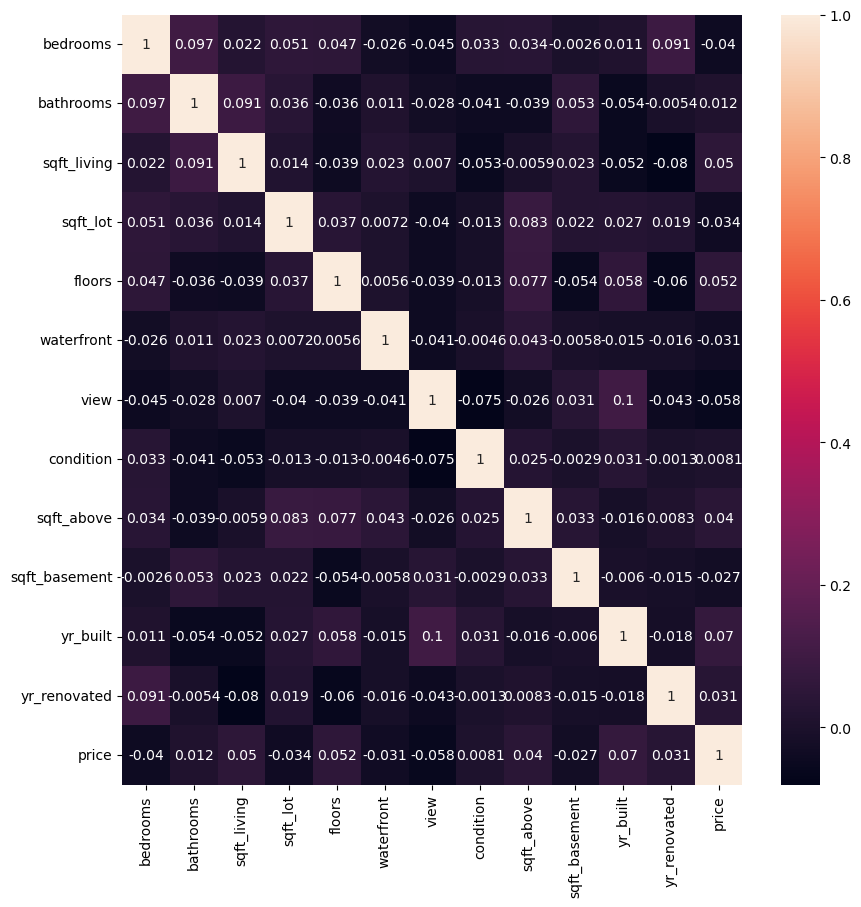

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [10]:
x=dataset.iloc[:,:-1]
y=dataset["price"]

In [11]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [14]:
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,0.723079,0.058815,1.091388,0.546529,1.302945,-0.238919,-1.411017,-1.313943,-0.550539,1.085792,0.206939,-0.393337
1,1.425097,1.148826,-0.942971,1.332550,-1.164754,-0.238919,-0.713184,-0.417665,-1.436536,-1.588870,0.678391,-0.393337
2,0.021061,-0.577025,-0.627157,-0.048476,1.302945,-0.238919,-0.713184,-1.313943,1.101591,1.181067,-0.098117,-0.393337
3,1.425097,1.387266,1.672520,-0.611915,1.302945,-0.238919,0.682480,-1.313943,1.142545,0.755816,-0.347709,-0.393337
4,1.425097,-0.338585,-1.264397,-0.831012,-1.164754,-0.238919,0.682480,0.478612,0.392394,0.370070,-1.068753,-0.393337
...,...,...,...,...,...,...,...,...,...,...,...,...
495,-1.382976,1.387266,0.695418,1.636457,-1.164754,-0.238919,0.682480,1.374890,-0.488609,1.155505,0.401067,-0.393337
496,0.021061,-1.621618,0.660149,0.181109,0.069096,-0.238919,0.682480,-1.313943,-0.799257,0.567591,0.789321,-0.393337
497,-1.382976,-1.371824,1.202805,-0.024265,0.069096,4.185513,-1.411017,1.374890,-0.807248,-0.224816,0.317869,-0.393337
498,-1.382976,-0.963070,0.045352,-0.147749,0.069096,-0.238919,-0.015352,-0.417665,0.450328,0.725607,-1.429275,-0.393337


In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [20]:
x_train.shape,y_train.shape

((375, 12), (375,))

In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

# LinearRegression

In [26]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [27]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [29]:
lr.score(x_test,y_test)*100

-5.1200279858175435

In [32]:
lr.coef_

array([-34738.69603907,  25188.52698802,  12221.3528046 ,  -7339.26892967,
        30861.98479939,   1402.86993508, -13587.03781451,   7037.23220452,
        20284.70636779, -33306.06241294,  28115.71003427,  16030.82096629])

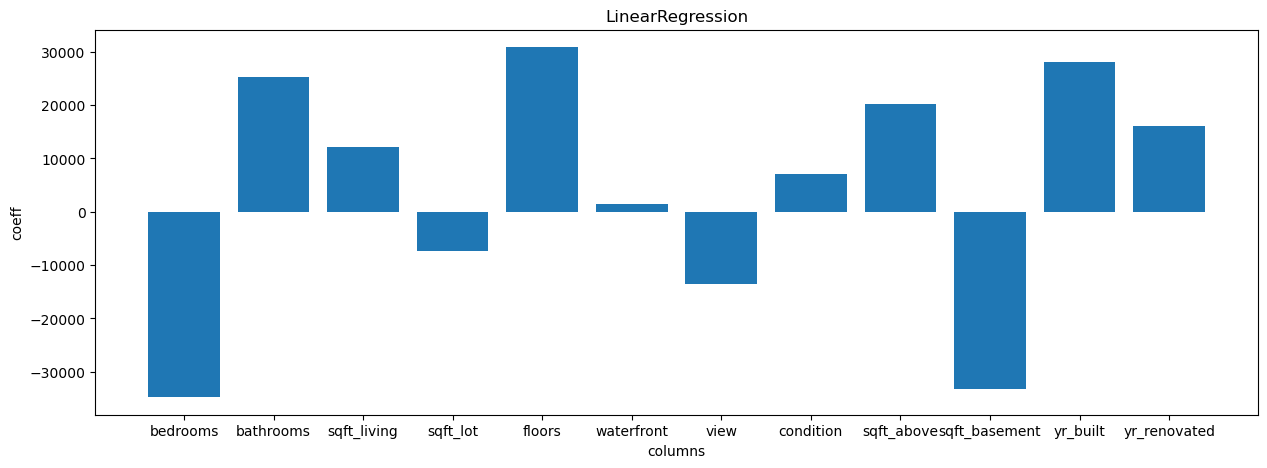

In [34]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,lr.coef_)
plt.title("LinearRegression")
plt.xlabel("columns")
plt.ylabel("coeff")
plt.show()

In [53]:
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(mean_squared_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

383009.0666306103
197386771249.53412
444282.31030453386


# Lasso

In [43]:
la=Lasso(alpha=0.01)
la.fit(x_train,y_train)

Lasso(alpha=0.01)

In [44]:
la.score(x_test,y_test)

-0.05120026309116388

In [45]:
la.coef_

array([-34738.68205179,  25188.51578833,  12221.34170924,  -7339.25851287,
        30861.9764424 ,   1402.86125404, -13587.02988023,   7037.22270556,
        20284.69578117, -33306.05330401,  28115.6982031 ,  16030.81047313])

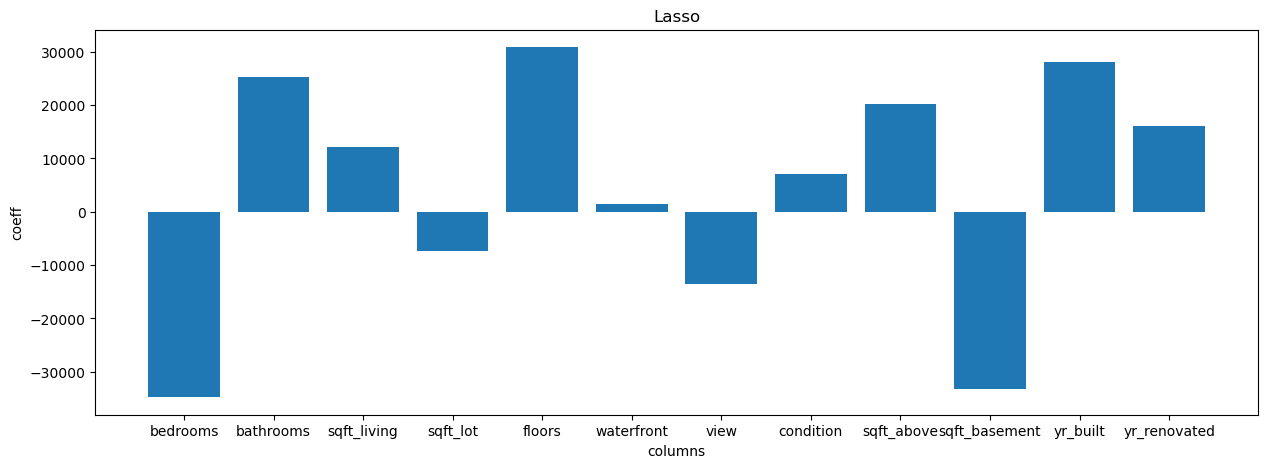

In [46]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,la.coef_)
plt.title("Lasso")
plt.xlabel("columns")
plt.ylabel("coeff")
plt.show()

In [54]:
print(mean_absolute_error(y_test,la.predict(x_test)))
print(mean_squared_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

383009.0656397265
197386768101.14618
444282.30676130485


# Ridge

In [47]:
ri=Ridge(alpha=0.1)
ri.fit(x_train,y_train)

Ridge(alpha=0.1)

In [48]:
ri.score(x_test,y_test)

-0.05118387697858684

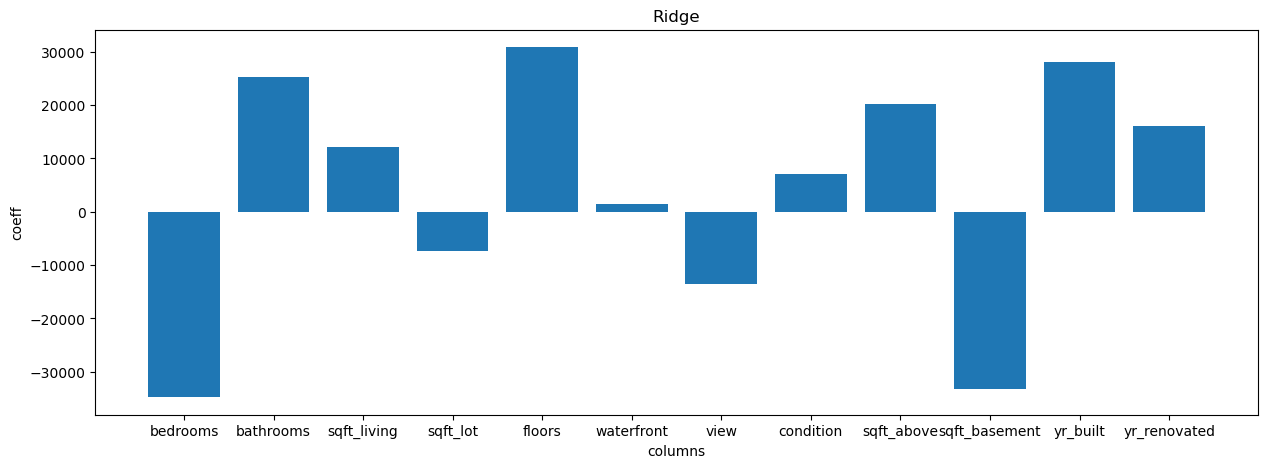

In [49]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,ri.coef_)
plt.title("Ridge")
plt.xlabel("columns")
plt.ylabel("coeff")
plt.show()

In [55]:
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(mean_squared_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

383008.0305335526
197383691235.66498
444278.8440109038
